# 数字图像处理 第二次实验记录

In [104]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy

def show_img(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap="gray", interpolation="bicubic")
    plt.xticks([])
    plt.yticks([])
    plt.show()

1.彩色图像转化为灰度图像

1.1.练习：运行并分析上述算法程序，对关键程序语句进行注解。

512 510


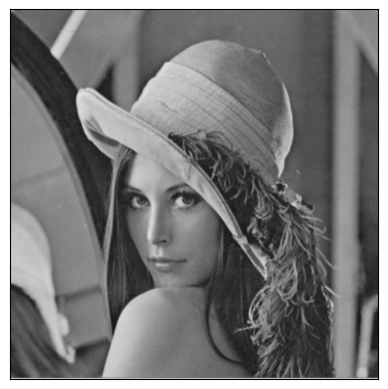

In [105]:
img = cv2.imread ('lena.png', 1)
img_gray = cv2.imread ('lena.png', 0)
h, w = img.shape[0:2] # 获得图像的高宽
print(h,w)
gray = np.zeros((h, w), dtype=img.dtype) # 申请大小为h*w初始值为0的新数组
for i in range(h):
    for j in range(w):
        gray[i, j] = (0.3*int(img[i, j, 0]) + 0.59*int(img[i, j, 1]) + 0.11*int(img[i, j, 2])) # 对RGB加权得到灰度图,0.3红色分量,0.59绿色分量,0.11蓝色分量
show_img(gray)

1.2 练习：编写利用 cv2.cvtColor 函数实现彩色图像转化为灰度图像的程序。

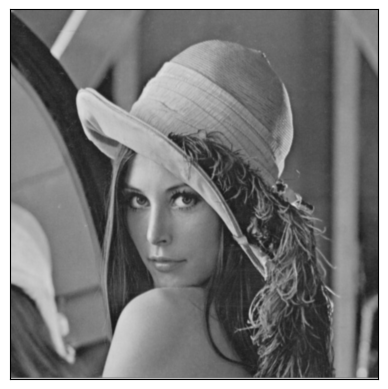

In [106]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
show_img(gray)

2.灰度变换

In [107]:
# 定义线性灰度变化函数
# k>1 时 实现灰度数值的拉伸
# 0<k<1 时 实现灰度数值的压缩
# k=-1 b=255 实现灰度反转
def linear_trans(img, k, b=0):
    # 计算灰度线性变化的映射表
    trans_list = [(np.float32(x)*k+b) for x in range(256)]
    # 将列表转换为 np.array
    trans_table =np.array(trans_list)
    # 将超过[0,255]灰度范围的数值进行调整,并指定数据类型为 uint8
    trans_table[trans_table>255] = 255
    trans_table[trans_table<0] = 0
    trans_table = np.round(trans_table).astype(np.uint8)
    # 使用 OpenCV 的 look up table 函数修改图像的灰度值
    return cv2.LUT(img, trans_table)

2.1 反转

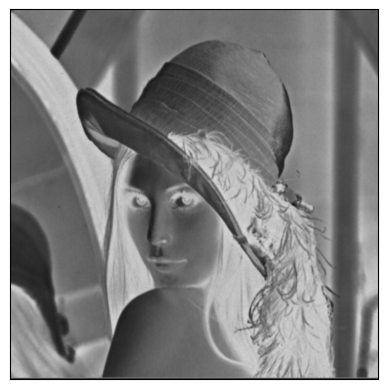

In [108]:
# 反转
im_inversion = linear_trans(img_gray, -1, 255)
show_img(im_inversion)

2.2 灰度拉伸

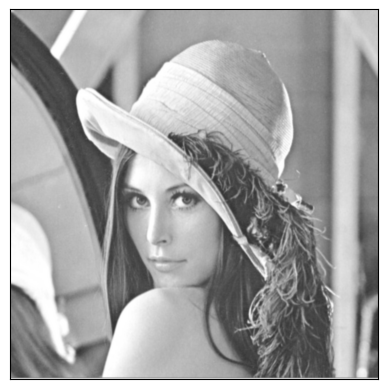

In [109]:
# 灰度拉伸
im_stretch = linear_trans(img_gray, 1.2)
show_img(im_stretch)

2.3 灰度压缩

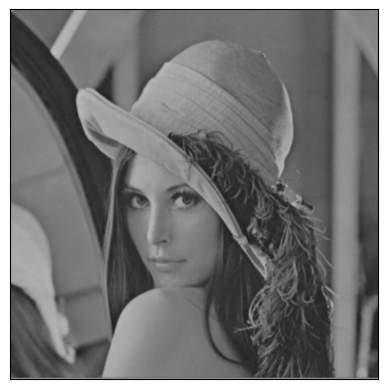

In [110]:
# 灰度压缩
im_compress = linear_trans(img_gray, 0.8)
show_img(im_compress)

3. 图像几何变换

3.1 平移

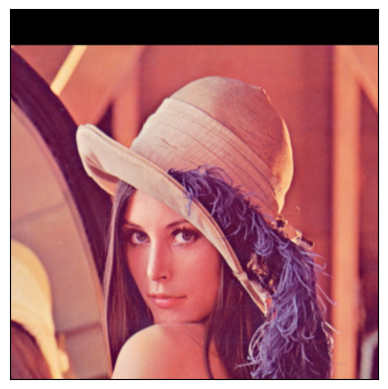

In [111]:
# 定义平移 translate 函数
def translate(img, x, y):
    # 获取图像尺寸
    (h, w) = img.shape[:2]
    # 定义平移矩阵
    M = np.float32([[1, 0, x], [0, 1, y]])
    # 使用 OpenCV 仿射变换函数实现平移操作
    shifted = cv2.warpAffine(img, M, (w, h))
    # 返回转换后的图像
    return shifted
# 对原图做平移操作
# 下移 50 像素
shifted = translate(img, 0, 50)
show_img(shifted)

3.2 旋转

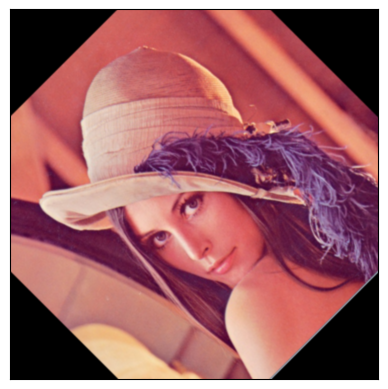

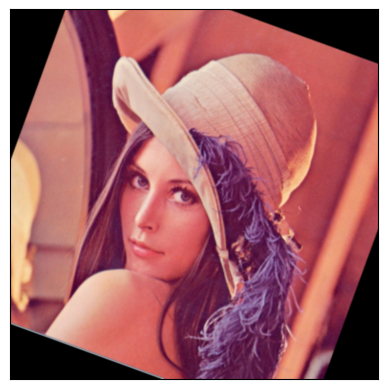

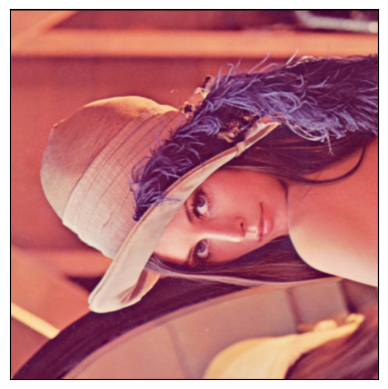

In [112]:
# 定义旋转 rotate 函数
def rotate(img, angle, center=None, scale=1.0):
    # 获取图像尺寸
    (h, w) = img.shape[:2]
    # 旋转中心的缺失值为图像中心
    if center is None:center = (w / 2, h / 2)
    # 调用计算旋转矩阵函数
    M = cv2.getRotationMatrix2D(center, angle, scale)
    # 使用 OpenCV 仿射变换函数实现旋转操作
    rotated = cv2.warpAffine(img, M, (w, h))
    # 返回旋转后的图像
    return rotated
# 逆时针 45 度
rotated = rotate(img, 45)
show_img(rotated)
# 顺时针 20 度
rotated = rotate(img, -20)
show_img(rotated)
# 逆时针 90 度
rotated = rotate(img, 90)
show_img(rotated)

3.3 镜像

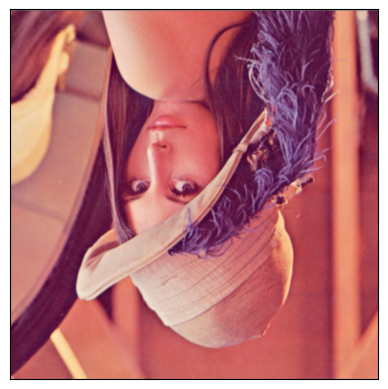

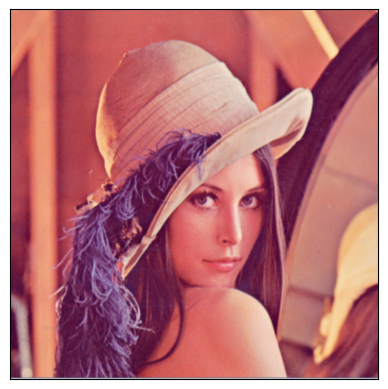

In [113]:
# 进行垂直镜像
im_flip0 = cv2.flip(img, 0)
show_img(im_flip0)
# 进行水平镜像
im_flip1 = cv2.flip(img, 1)
show_img(im_flip1)

3.4 缩放

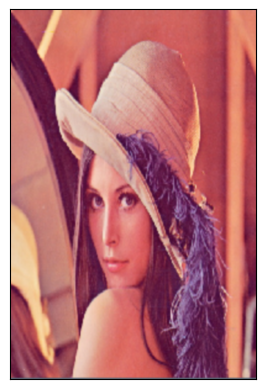

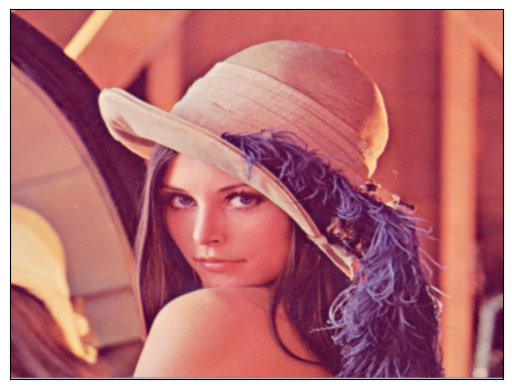

In [114]:
# 获取图像尺寸
(h, w) = img.shape[:2]
# 缩放的目标尺寸
dst_size = (200,300)
# 最邻近插值
method = cv2.INTER_NEAREST
# 进行缩放
resized = cv2.resize(img, dst_size, interpolation = method)
show_img(resized)
# 缩放的目标尺寸
dst_size = (800,600)
# 双线性插值
method = cv2.INTER_LINEAR
# 进行缩放
resized = cv2.resize(img, dst_size, interpolation = method)
show_img(resized)

3.5 仿射变换

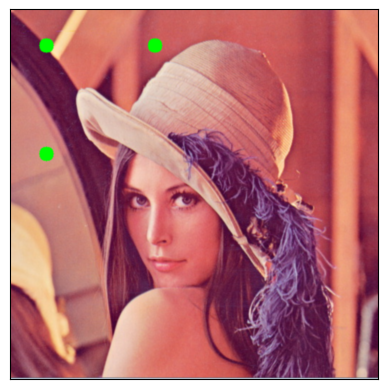

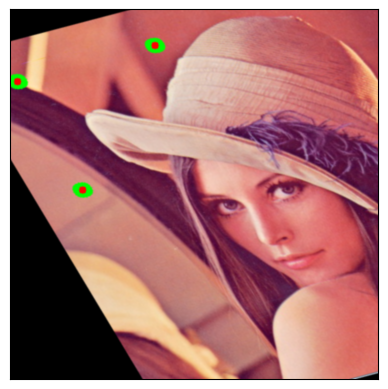

In [115]:
# 获取图像尺寸
(h, w) = img.shape[:2]
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
draw = copy.deepcopy(img)
for p in pts1:
    cv2.circle(draw, (int(p[0]), int(p[1])), 10, (0,255,0), thickness=-1)

show_img(draw)
M = cv2.getAffineTransform(pts1, pts2)
affined = cv2.warpAffine(draw, M, (w, h))
for p in pts2:
    cv2.circle(affined, (int(p[0]), int(p[1])), 5, (0,0,255), thickness=-1)
show_img(affined)

4.图像上的算术运算

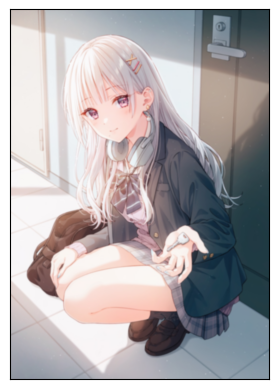

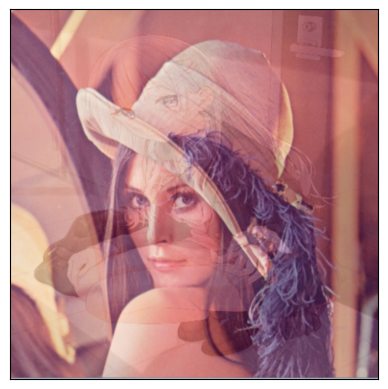

In [116]:
img2 = cv2.imread("109286725_p0.jpg")
show_img(img2)
img2 = cv2.resize(img2, (w, h), interpolation = method) # 匹配尺寸
combined = cv2.addWeighted(img, 0.7, img2, 0.3, 0)
show_img(combined)

（2）练习：编写图像仿射变换的程序，并展示运行结果。

**见上**

（3）练习：如果输入的两幅图像分辨率大小不同，如何进行图像融合，尝试编写相应
的程序。

**见上**

（4）练习：尝试编写图像灰度伽马变换的程序，并对比不同 gamma 值变换前后的效果
变化。

$$
D_B=c\times D_A^v
$$

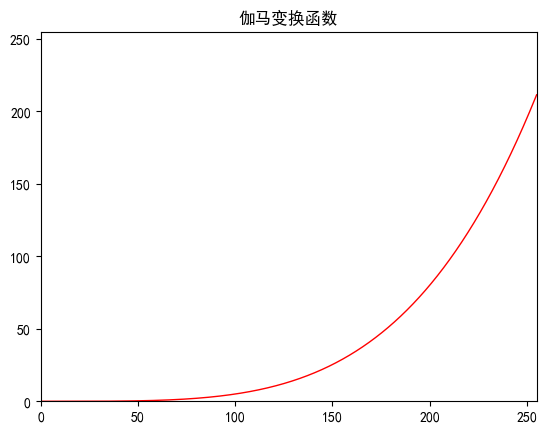

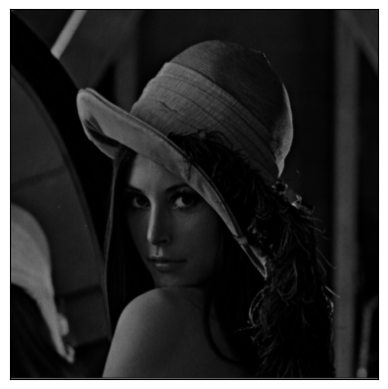

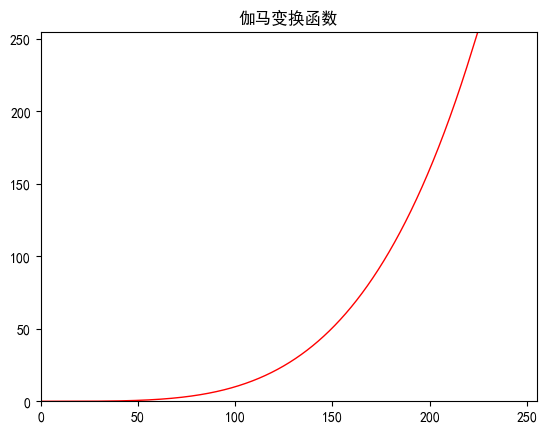

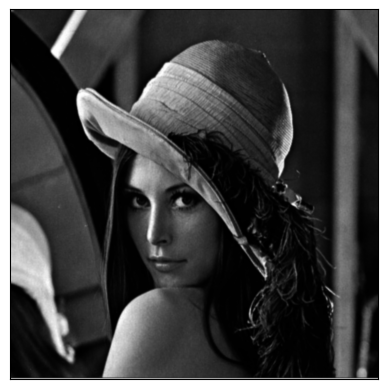

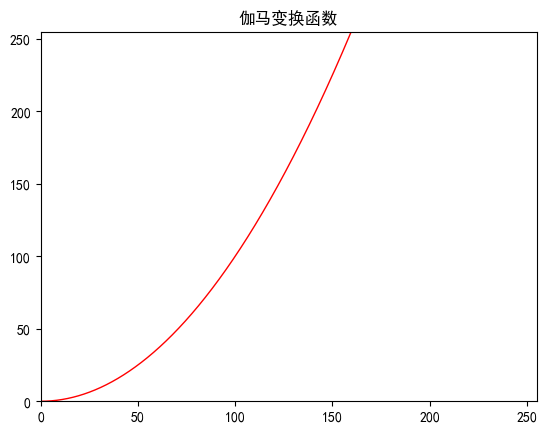

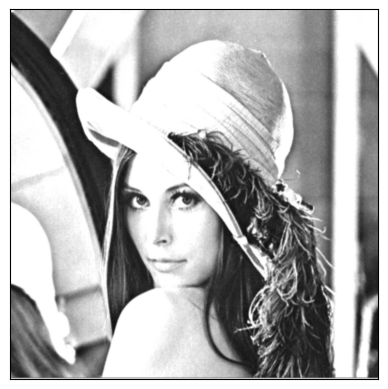

In [119]:
#绘制曲线
def gamma_plot(c, v):
    x = np.arange(0, 256, 0.01)
    y = c*x**v
    y[y>255] = 255
    plt.plot(x, y, 'r', linewidth=1)
    plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文标签
    plt.title(u'伽马变换函数')
    plt.xlim([0, 255]), plt.ylim([0, 255])
    plt.show()

#伽玛变换
def gamma(img, c, v):
    lut = np.zeros(256, dtype=np.float32)
    for i in range(256):
        lut[i] = min(c * i ** v, 255)
    output_img = cv2.LUT(img, lut) #像素灰度值的映射
    output_img = np.uint8(output_img+0.5)  
    return output_img

def gamma_all_in_one(img_gray, c, v):
    gamma_plot(c, v)
    gammaed = gamma(img_gray, c, v)
    show_img(gammaed)

gamma_all_in_one(img_gray, 0.00000005, 4.0)
gamma_all_in_one(img_gray, 0.0000001, 4.0)
gamma_all_in_one(img_gray, 0.01, 2.0)